In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spatial_visualization import compare_two_datasets_on_map,compare_histograms

df = pd.read_csv('./data/Replica_processed/processed-original-trips-end-at-imd-2024-spring-thursday.csv')
df_with_google = pd.read_csv('./data/Replica_processed/processed_with_google-original-trips-end-at-imd-2024-spring-thursday.csv')

In [2]:
df.head().T


0                     1  \
activity_id       11195776143997613937  15890157103751998101   
age                               55.0                  56.0   
male                                 0                     0   
numvec                               2                     3   
higheduc                             0                     0   
hhsize                             2.0                   9.0   
hhinc                          79041.0              159615.0   
mode_four_kinds                      0                     0   
mode_three_kinds                     0                     0   
purpose                    maintenance                   eat   
o_fips                    170119653001          170316709001   
d_fips                    170318382002          170318382002   
transit_cost                       NaN                   NaN   
toll_cost                          NaN                   NaN   
parking_cost                       NaN                   NaN   
transit_time                       NaN                   NaN   
transit_dist                       NaN                   NaN   
auto_time                   122.116667                  18.8   
auto_dist                   182.558015             17.653254   
bike_time                          NaN                   NaN   
bike_dist                          NaN                   NaN   
walk_time                          NaN                   NaN   
walk_dist                          NaN                   NaN   

                                    2                    3  \
activity_id       8544156882190917720  3359228516309820827   
age                              29.0                 54.0   
male                                1                    0   
numvec                              3                    1   
higheduc                            1                    1   
hhsize                            3.0                  2.0   
hhinc                         42183.0             385863.0   
mode_four_kinds                     0                    0   
mode_three_kinds                    0                    0   
purpose                        school          maintenance   
o_fips                   170316709001         170310701021   
d_fips                   170318381001         170318382002   
transit_cost                      NaN                  NaN   
toll_cost                         NaN                  NaN   
parking_cost                      NaN                  NaN   
transit_time                      NaN                 57.4   
transit_dist                      NaN            11.285726   
auto_time                       15.75                18.65   
auto_dist                   11.027965             9.769716   
bike_time                         NaN                 30.3   
bike_dist                         NaN             8.826332   
walk_time                         NaN                  NaN   
walk_dist                         NaN                  NaN   

                                    4  
activity_id       2269080699016021358  
age                              53.0  
male                                0  
numvec                              2  
higheduc                            1  
hhsize                            2.0  
hhinc                         62342.0  
mode_four_kinds                     0  
mode_three_kinds                    0  
purpose                   maintenance  
o_fips                   170310102012  
d_fips                   170318382002  
transit_cost                      NaN  
toll_cost                         NaN  
parking_cost                      NaN  
transit_time                      NaN  
transit_dist                      NaN  
auto_time                       43.65  
auto_dist                   23.045035  
bike_time                         NaN  
bike_dist                         NaN  
walk_time                         NaN  
walk_dist                         NaN

## Compare two data resources

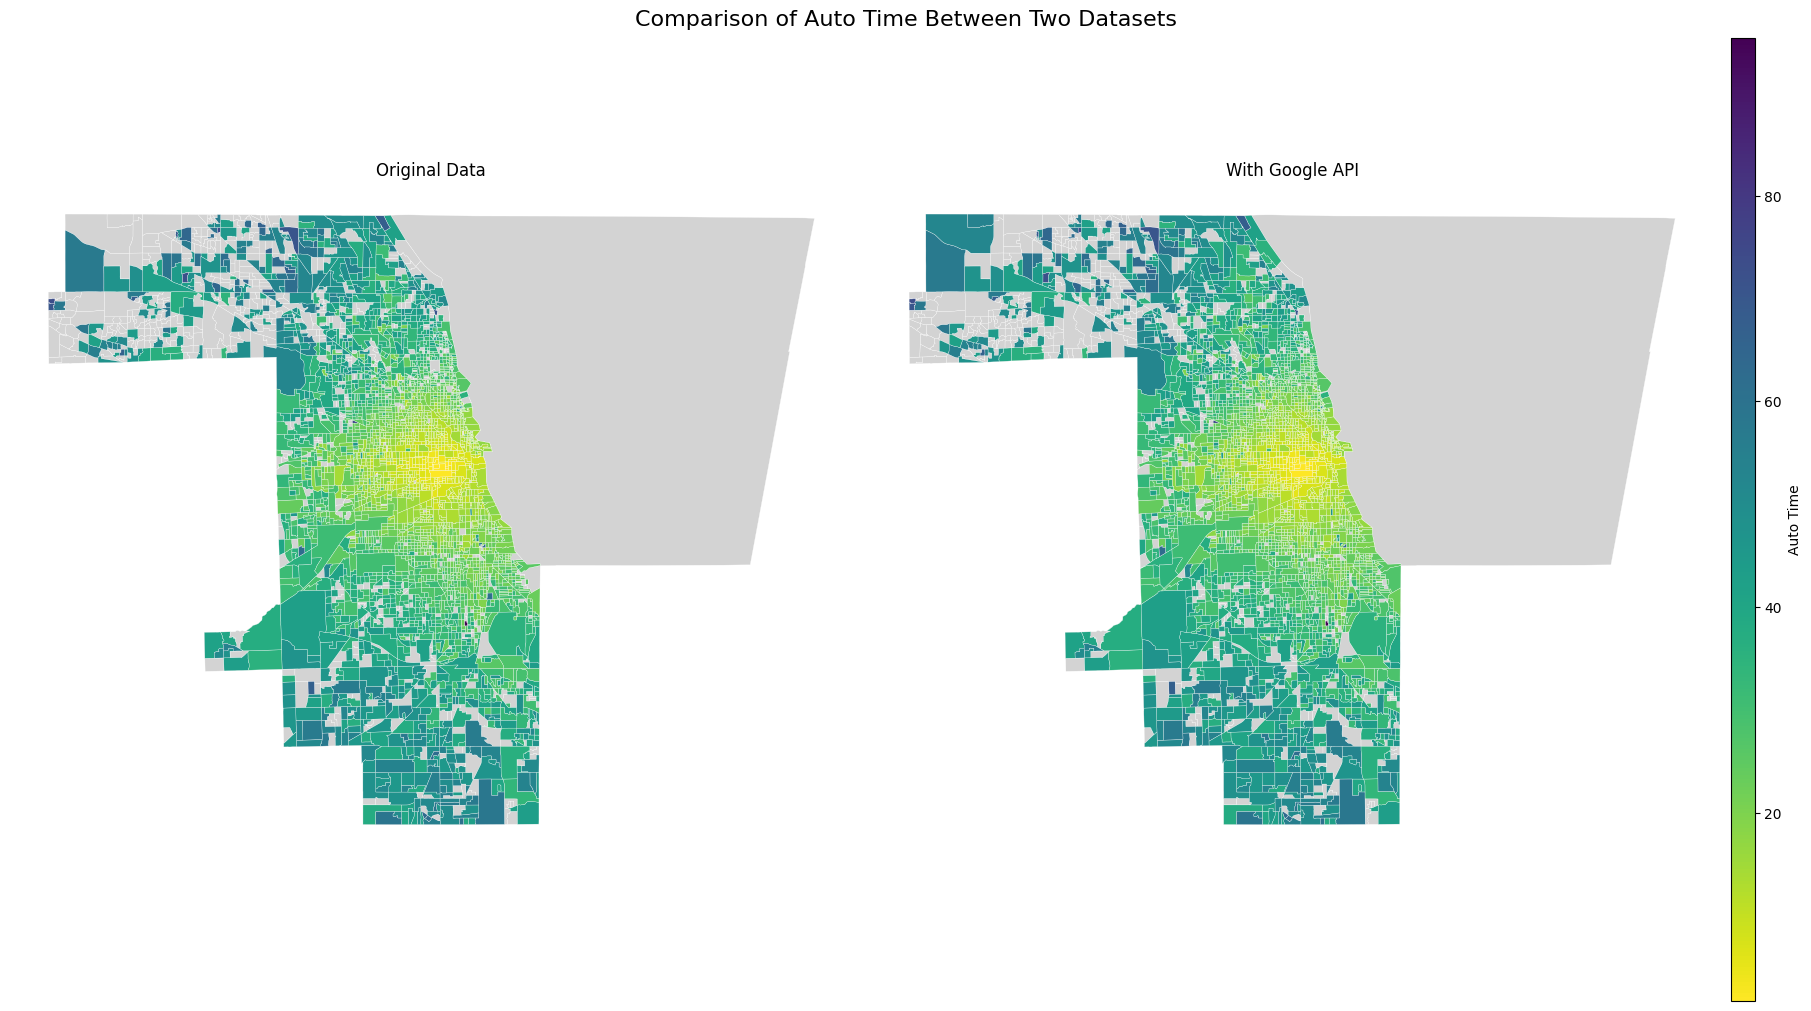

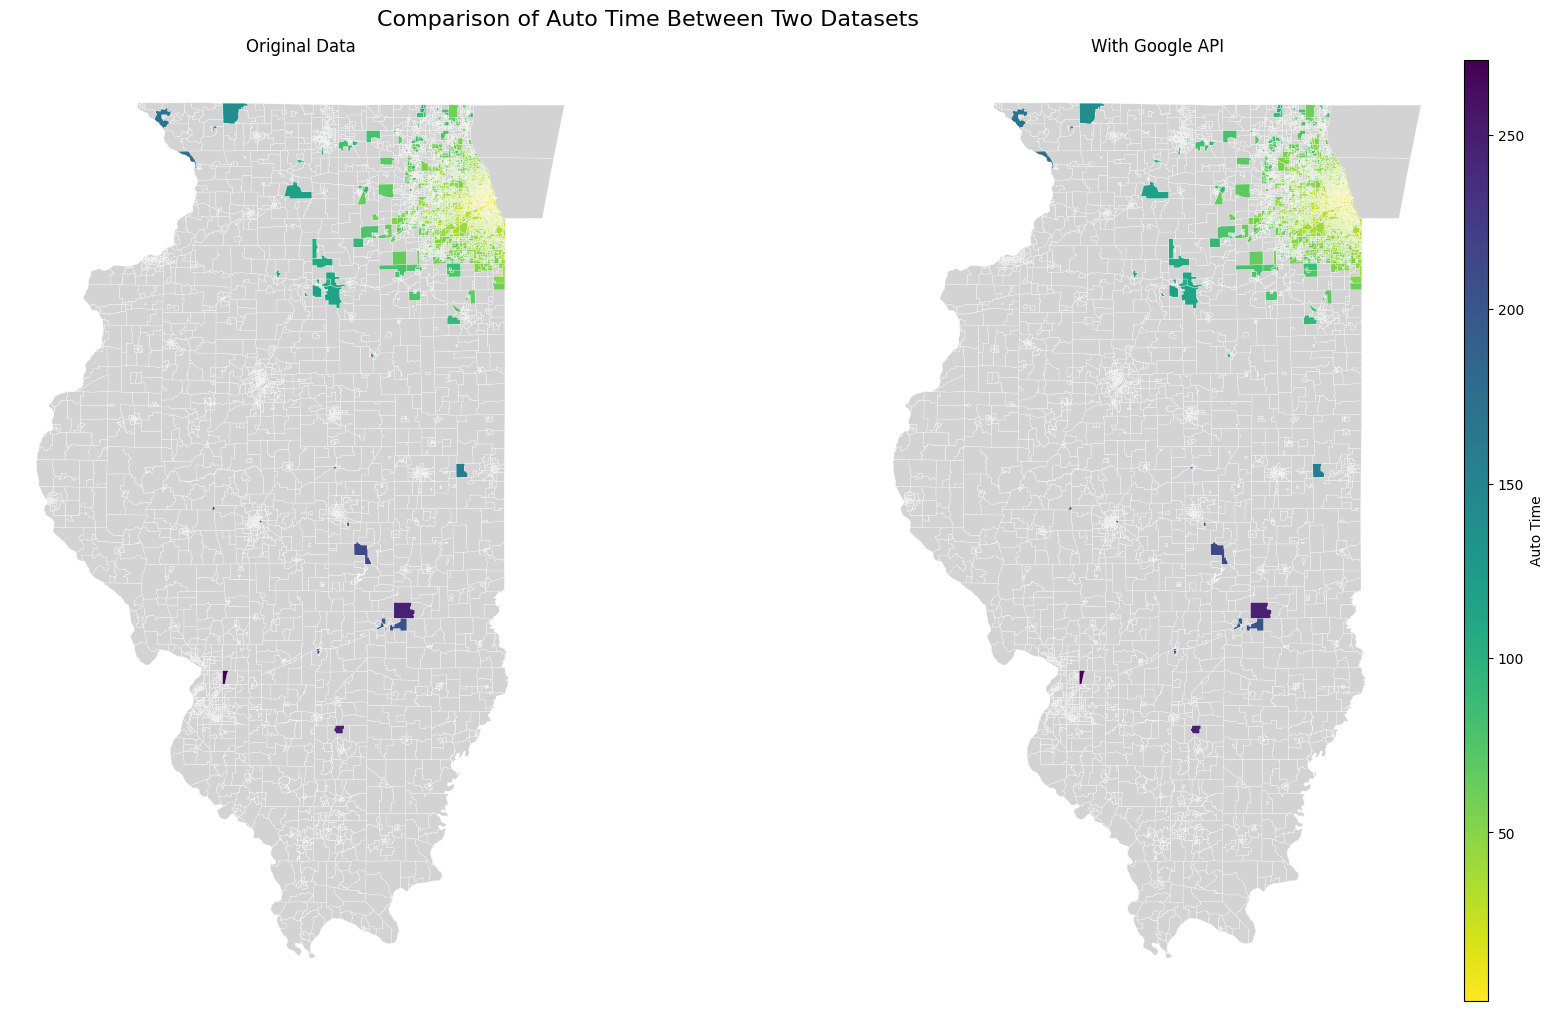

In [3]:
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='auto_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'With Google API')
)
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='auto_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data', 'With Google API')
)

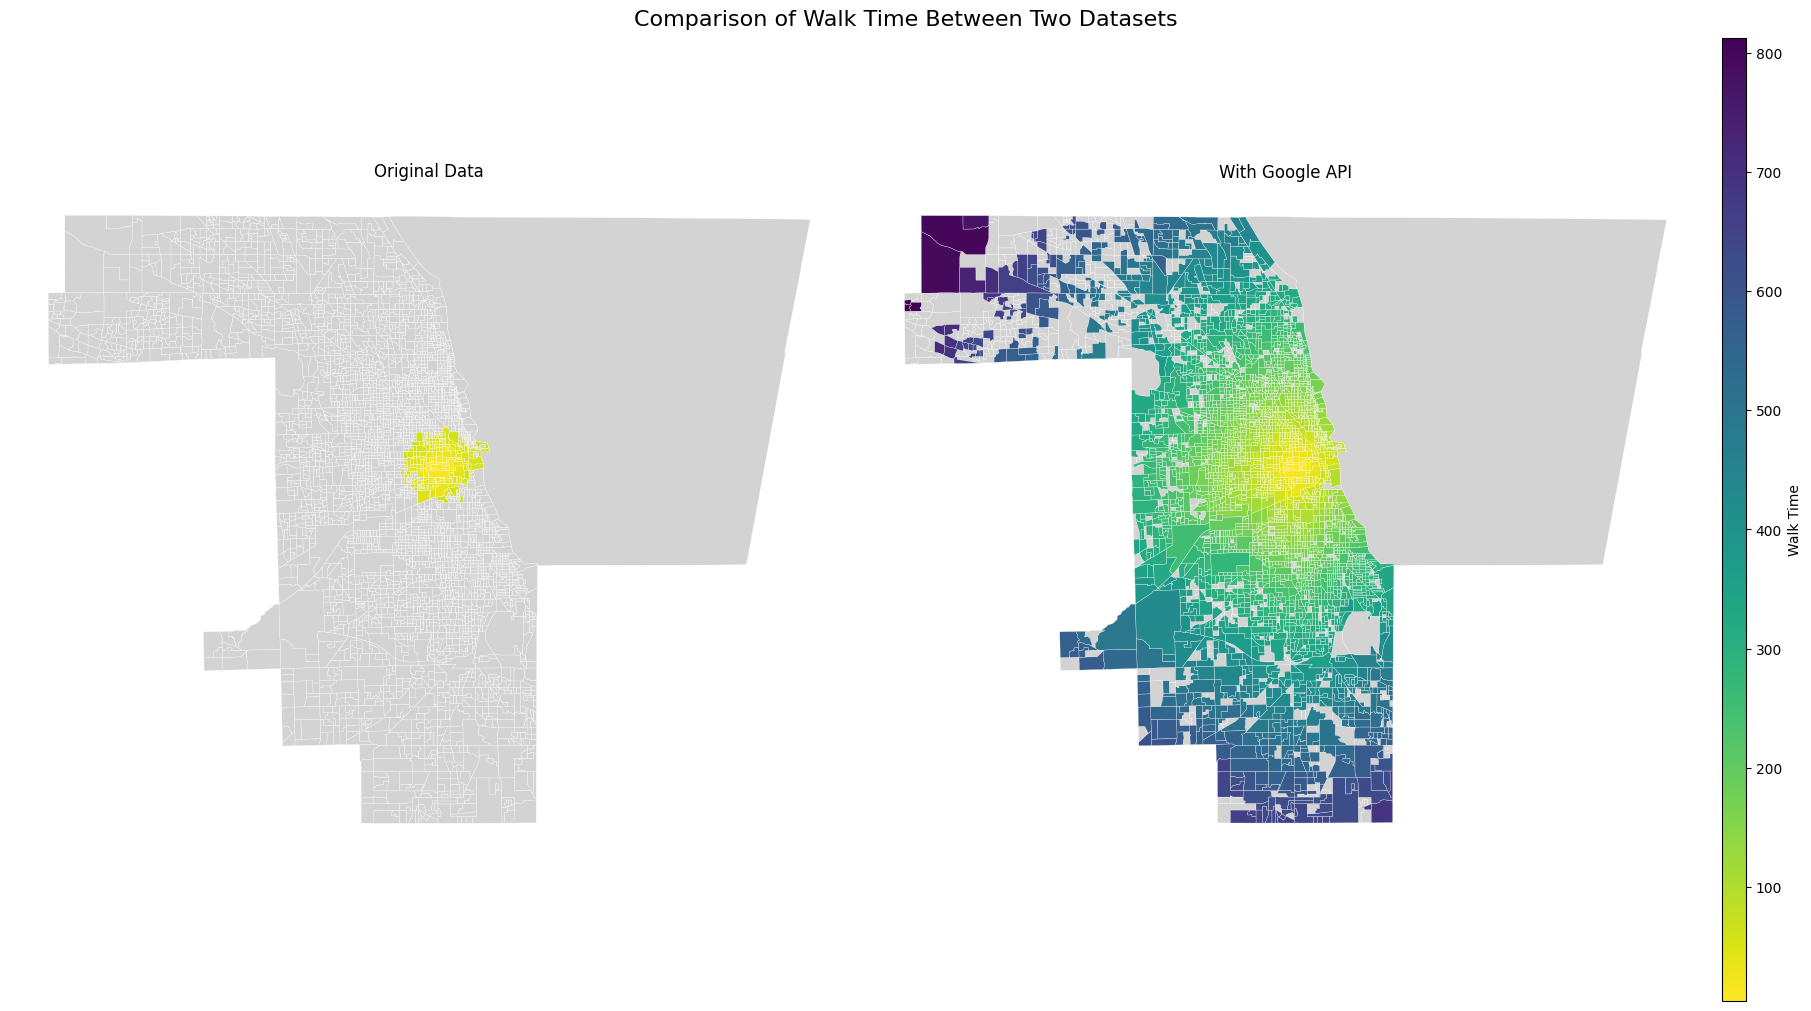

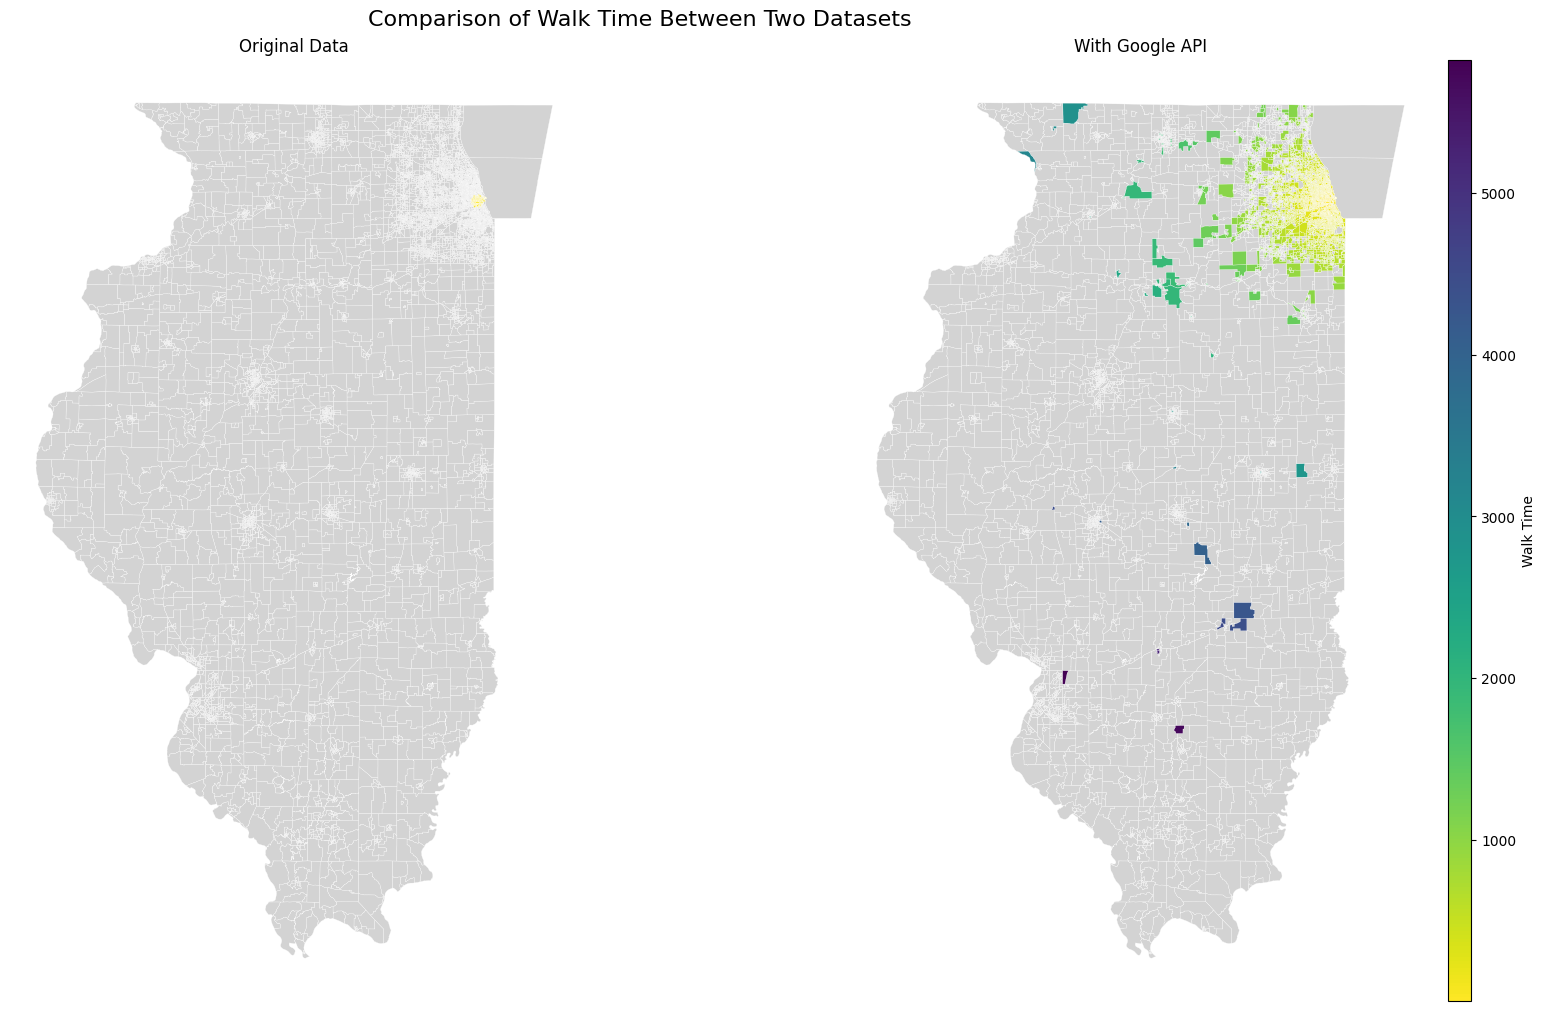

In [4]:
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='walk_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'With Google API')
)
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='walk_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data', 'With Google API')
)

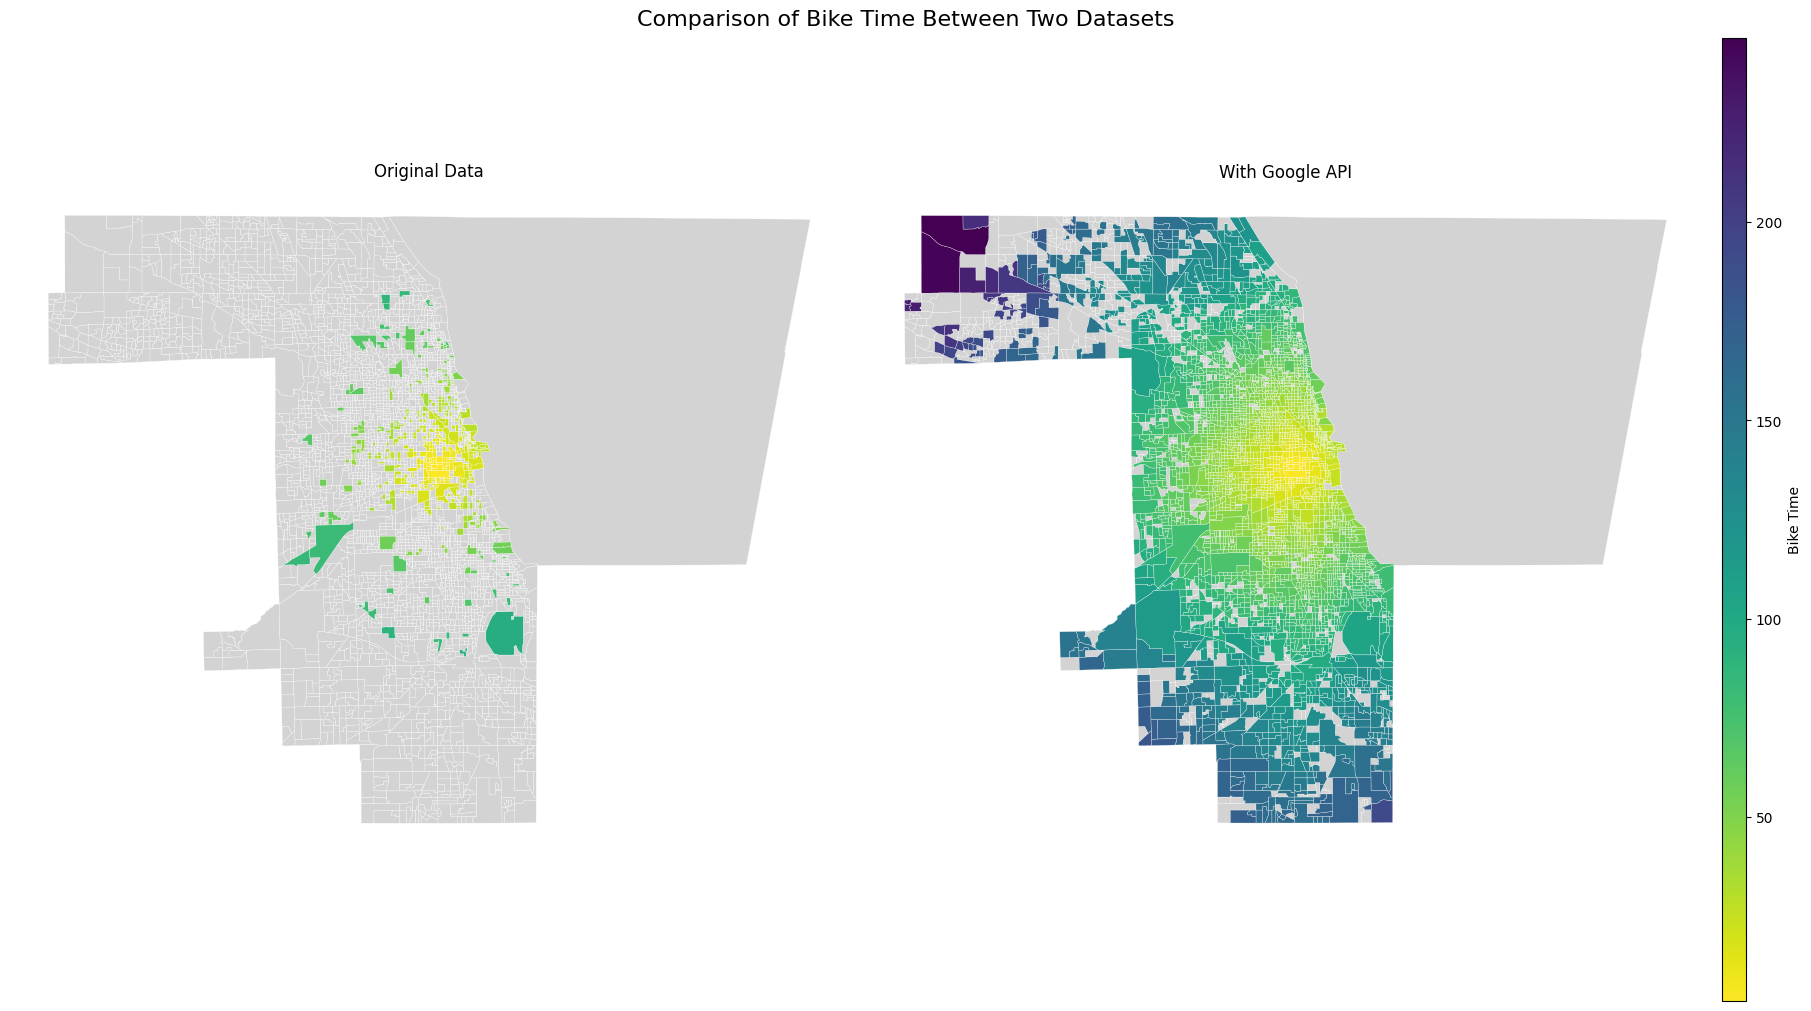

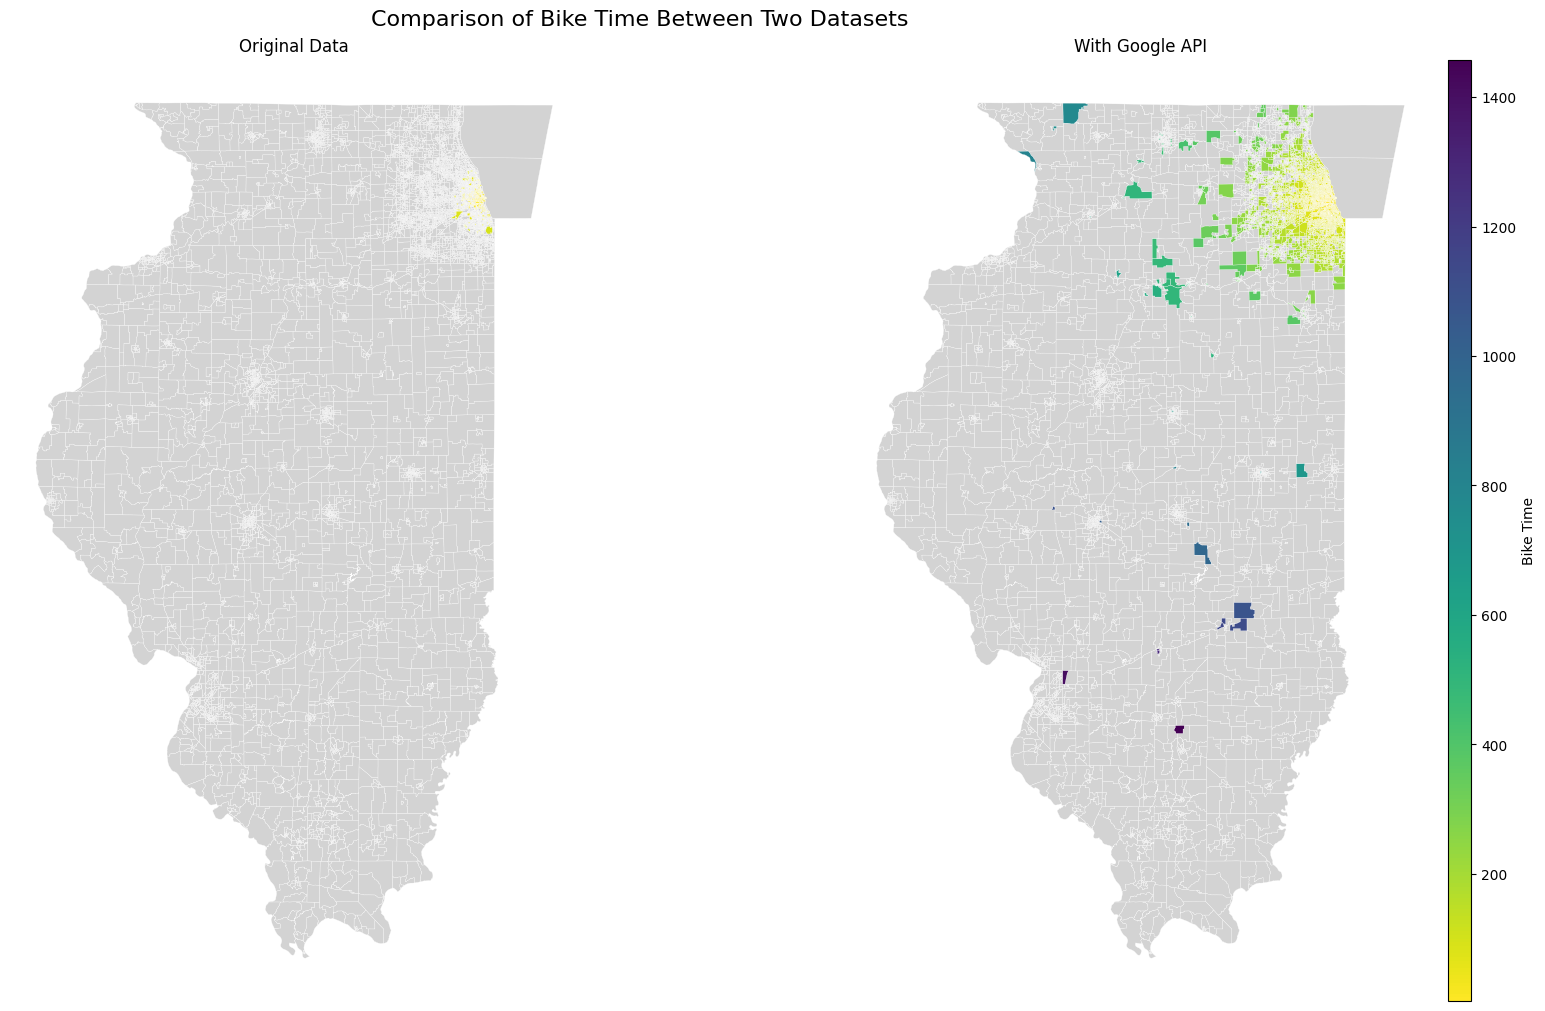

In [5]:
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='bike_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'With Google API')
)
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='bike_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data', 'With Google API')
)

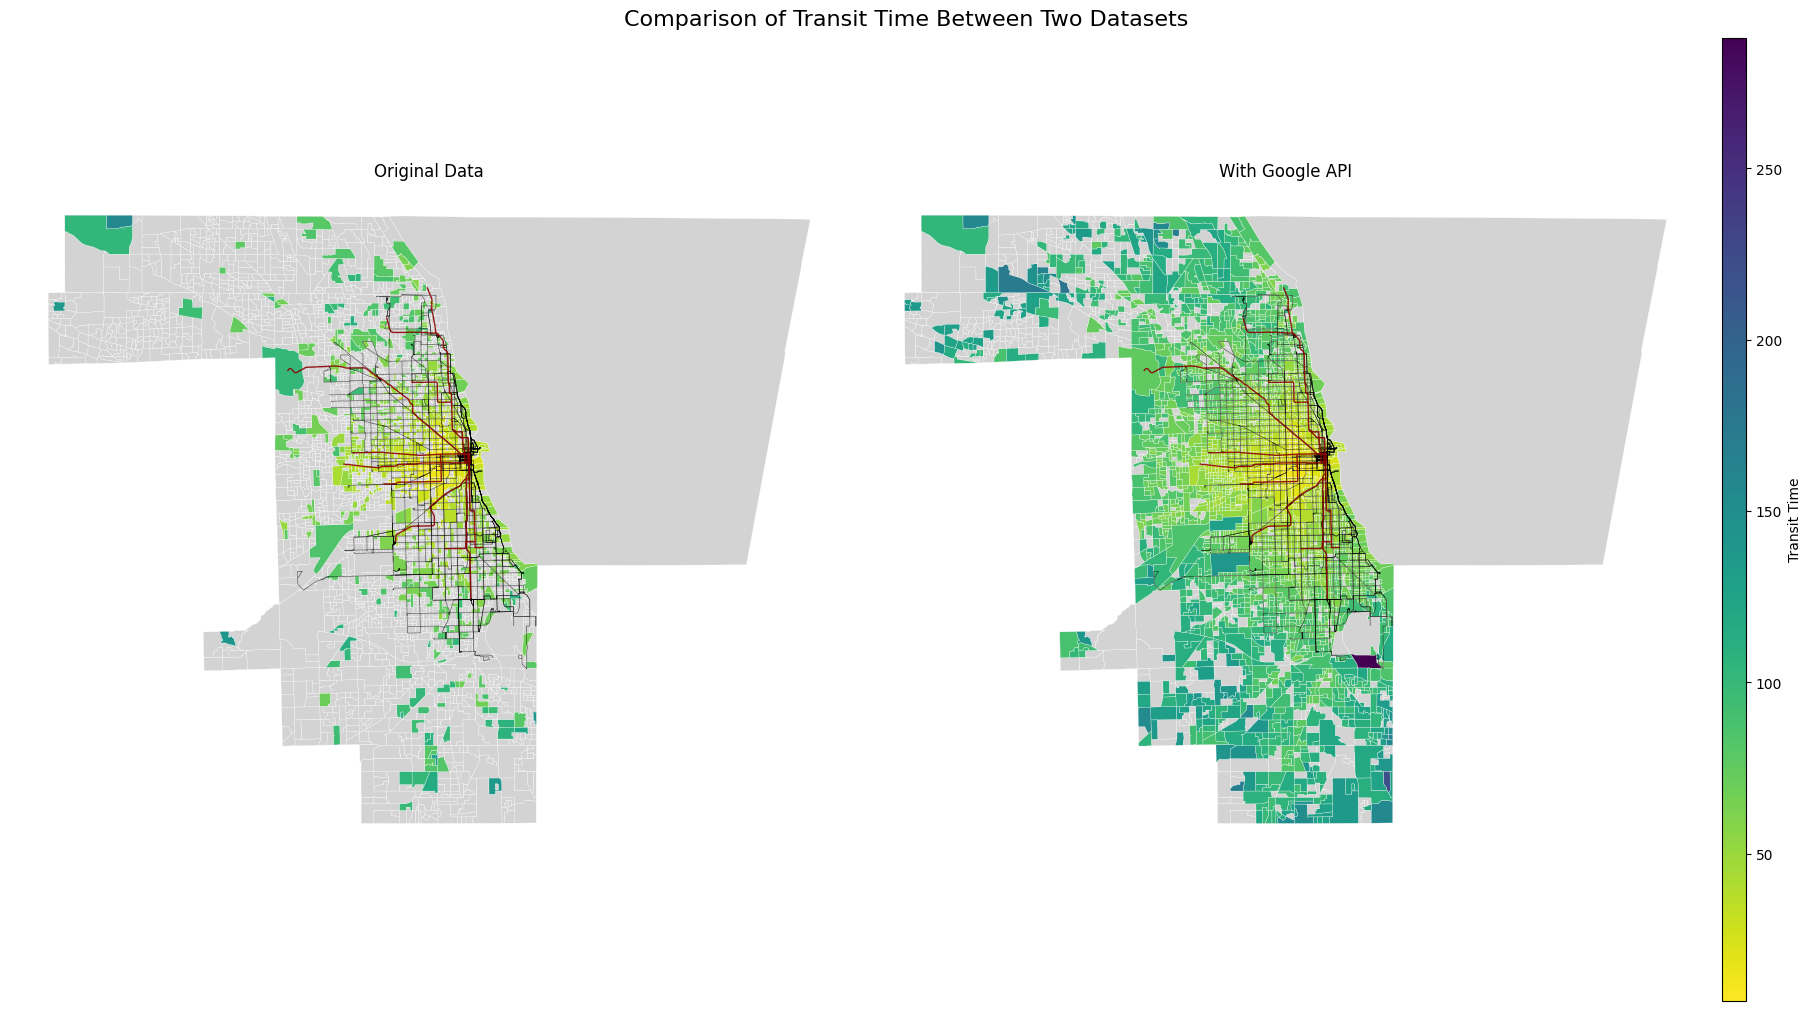

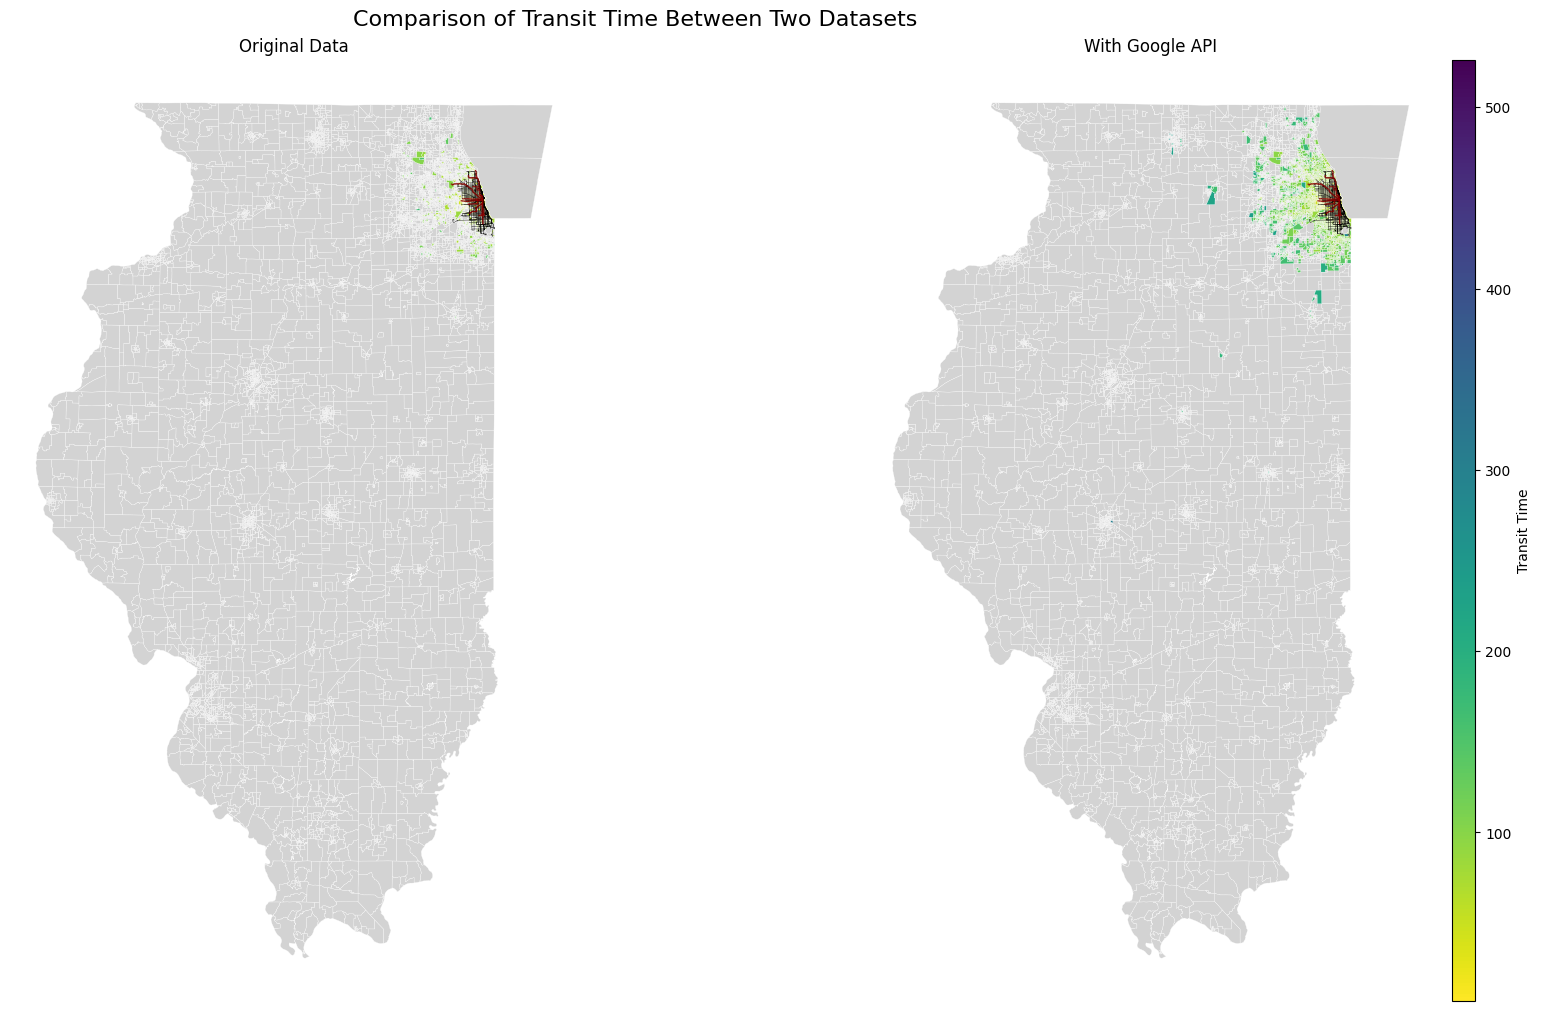

In [6]:
compare_two_datasets_on_map(
    df, df_with_google,
    value_column='transit_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data', 'With Google API'),
    bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)

compare_two_datasets_on_map(
    df, df_with_google,
    value_column='transit_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data', 'With Google API'),
    bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)


## Data Cleaning 

### remove the outliners of auto_time

In [7]:
# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_with_google['auto_time'].quantile(0.25)
Q3 = df_with_google['auto_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter: keep rows where auto_time is NaN or within the IQR bounds
df_clean = df_with_google[
    df_with_google['auto_time'].isna() |
    ((df_with_google['auto_time'] >= lower_bound) & (df_with_google['auto_time'] <= upper_bound))
].copy().dropna(subset=['auto_time'])

# Print the number of rows before and after removing outliers
print(f"Original rows: {len(df)}, After removing outliers: {len(df_clean)}")
df_clean['auto_time'].describe().T

Original rows: 48971, After removing outliers: 47837


count    47837.000000
mean        19.622682
std         14.133297
min          1.000000
25%          7.833333
50%         17.433333
75%         28.450000
max         61.416667
Name: auto_time, dtype: float64

In [8]:
df_with_google.describe().T

count          mean           std           min  \
activity_id       48971.0  9.220889e+18  5.308069e+18  9.888138e+13   
age               48971.0  4.325744e+01  1.617373e+01  3.000000e+00   
male              48971.0  4.005636e-01  4.900177e-01  0.000000e+00   
numvec            48971.0  1.596394e+00  9.172159e-01  0.000000e+00   
higheduc          48971.0  7.209777e-01  4.485231e-01  0.000000e+00   
hhsize            48971.0  3.238509e+00  2.115697e+00  1.000000e+00   
hhinc             48971.0  1.399621e+05  1.419813e+05  2.200000e+01   
mode_four_kinds   48971.0  4.276408e-01  9.445776e-01  0.000000e+00   
mode_three_kinds  48971.0  3.254988e-01  6.770781e-01  0.000000e+00   
transit_cost        337.0  2.684718e+00  8.702059e-01  2.250000e+00   
toll_cost             0.0           NaN           NaN           NaN   
parking_cost        840.0  4.925474e+01  5.337807e+01  0.000000e+00   
transit_time      46858.0  5.057411e+01  3.396052e+01  4.616667e+00   
transit_dist      46858.0  1.476480e+01  1.525818e+01  6.558061e-01   
auto_time         48952.0  2.109217e+01  1.799342e+01  1.000000e+00   
auto_dist         48952.0  1.568149e+01  2.120172e+01  3.937798e-01   
bike_time         47903.0  5.170792e+01  5.802172e+01  2.583333e+00   
bike_dist         47903.0  1.468749e+01  1.802451e+01  1.888584e-01   
walk_time         47934.0  1.830149e+02  2.214487e+02  1.116667e+00   
walk_dist         47934.0  1.323422e+01  1.607890e+01  9.382366e-02   

                           25%           50%           75%           max  
activity_id       4.661470e+18  9.173686e+18  1.383357e+19  1.844626e+19  
age               3.000000e+01  4.100000e+01  5.500000e+01  9.400000e+01  
male              0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
numvec            1.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  
higheduc          0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
hhsize            2.000000e+00  3.000000e+00  4.000000e+00  1.700000e+01  
hhinc             5.461700e+04  1.020680e+05  1.751390e+05  1.557700e+06  
mode_four_kinds   0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  
mode_three_kinds  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  
transit_cost      2.250000e+00  2.250000e+00  2.500000e+00  5.000000e+00  
toll_cost                  NaN           NaN           NaN           NaN  
parking_cost      3.410000e+00  6.000000e+00  1.000000e+02  1.250000e+02  
transit_time      2.305000e+01  4.553333e+01  6.978333e+01  5.260333e+02  
transit_dist      4.058660e+00  1.043800e+01  1.957900e+01  5.165040e+02  
auto_time         7.966667e+00  1.785000e+01  2.935000e+01  4.615500e+02  
auto_dist         4.270000e+00  1.064954e+01  1.988678e+01  6.973988e+02  
bike_time         1.610000e+01  3.770000e+01  6.593333e+01  1.457200e+03  
bike_dist         4.109000e+00  1.001500e+01  1.892900e+01  4.856130e+02  
walk_time         4.498333e+01  1.320500e+02  2.460667e+02  5.821517e+03  
walk_dist         3.603776e+00  9.372000e+00  1.763800e+01  4.300800e+02

### remove the outliers of public transport time

When collecting the transit times, we didn’t specify a departure time, so the API defaulted to ‘now,’ which led to some extremely long wait times; therefore, we need to find a way to filter them out.

In [9]:
# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_clean['transit_time'].quantile(0.25)
Q3 = df_clean['transit_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter: keep rows where auto_time is NaN or within the IQR bounds
df_clean2 = df_clean[
    df_clean['transit_time'].isna() |
    ((df_clean['transit_time'] >= lower_bound) & (df_clean['transit_time'] <= upper_bound))
].copy().dropna(subset=['transit_time'])

df_clean3 = df_clean2[df_clean2['transit_time'] < 3* df_clean2['walk_time']]

len(df_clean3)

44181

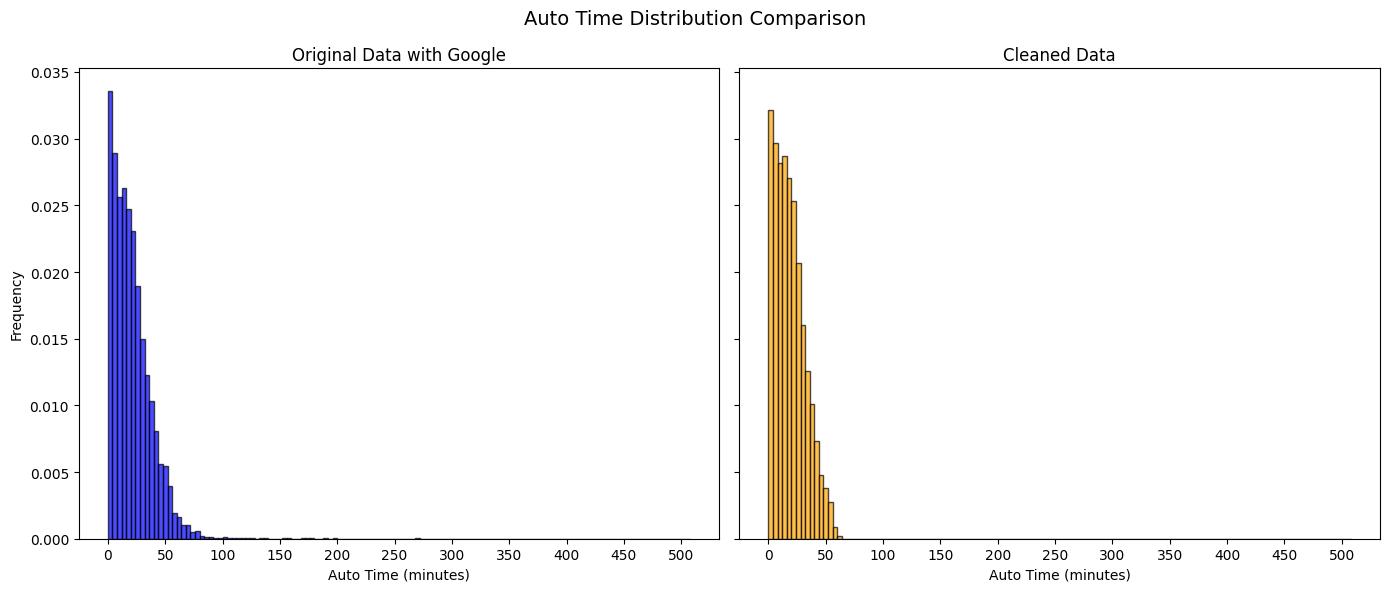

/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['o_fips'] = df['o_fips'].astype('Int64').astype(str).str.zfill(12)
/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_fips'] = df['d_fips'].astype('Int64').astype(str).str.zfill(12)


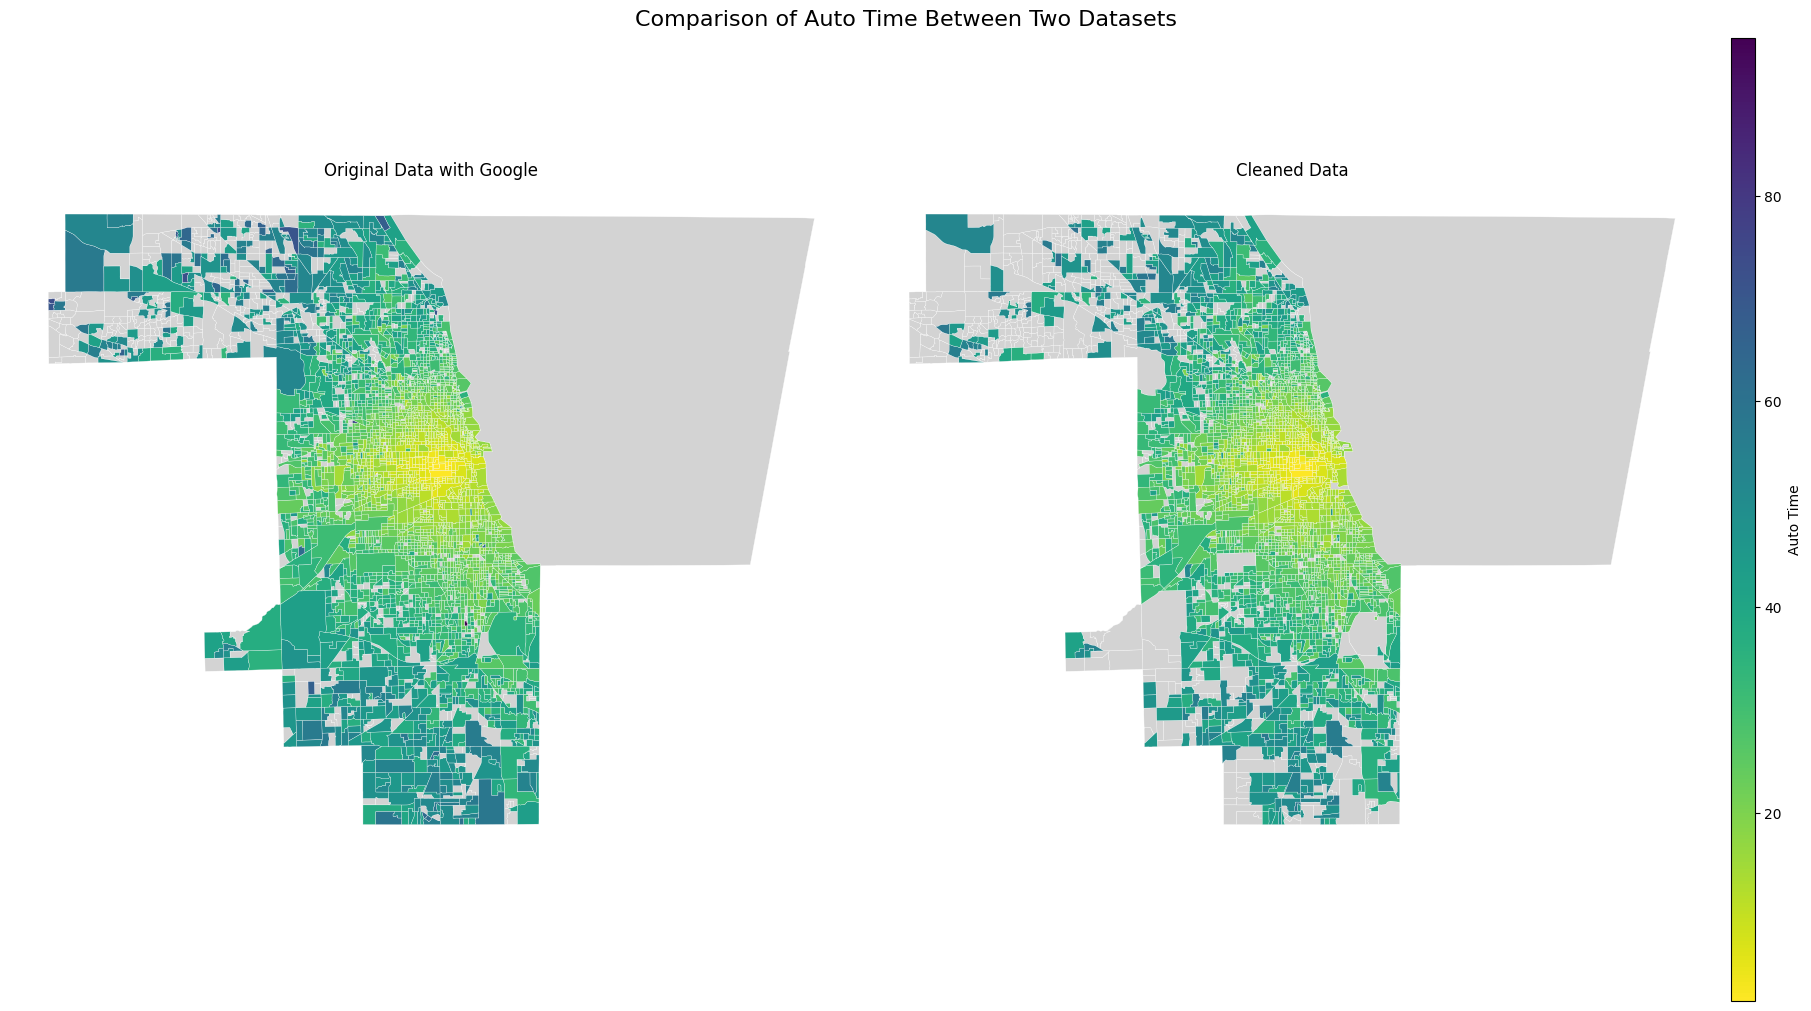

/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['o_fips'] = df['o_fips'].astype('Int64').astype(str).str.zfill(12)
/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_fips'] = df['d_fips'].astype('Int64').astype(str).str.zfill(12)


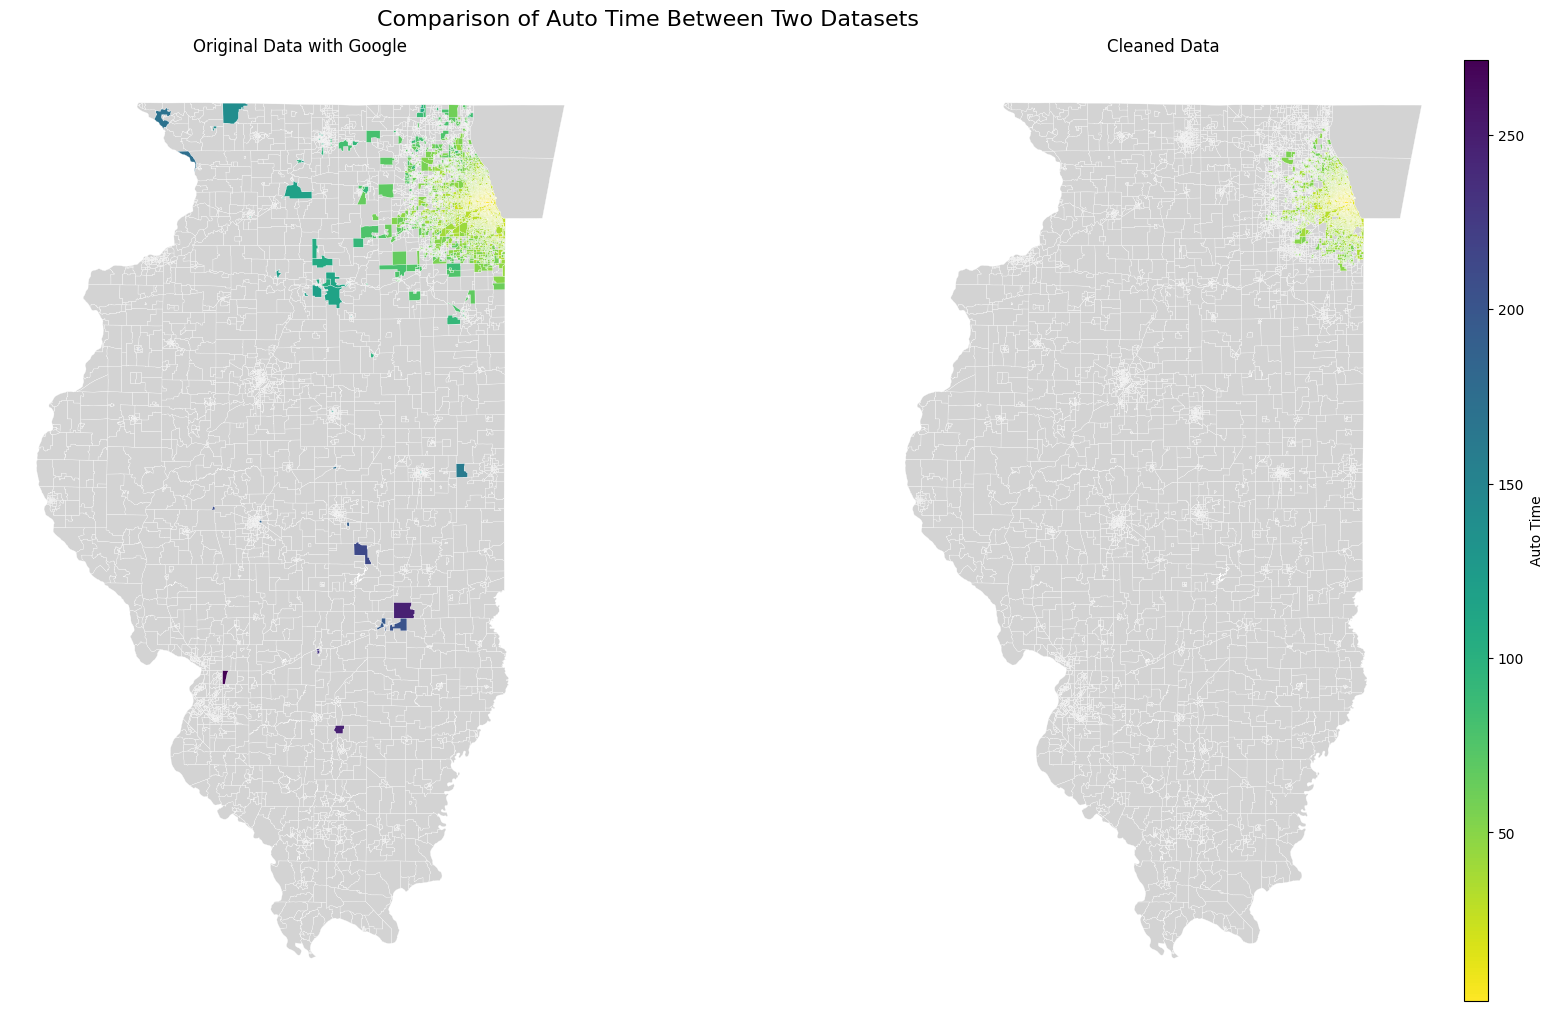

In [10]:
compare_histograms(
    df1=df_with_google,
    df2=df_clean3,
    column='auto_time',
    labels=('Original Data with Google', 'Cleaned Data'),
    colors=('blue', 'orange'),
    bins=100,
    step=50,
    title='Auto Time Distribution Comparison'
)
compare_two_datasets_on_map(
    df1=df_with_google,
    df2=df_clean3,
    value_column='auto_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data with Google', 'Cleaned Data'),
)
compare_two_datasets_on_map(
    df1=df_with_google,
    df2=df_clean3,
    value_column='auto_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data with Google', 'Cleaned Data'),
)

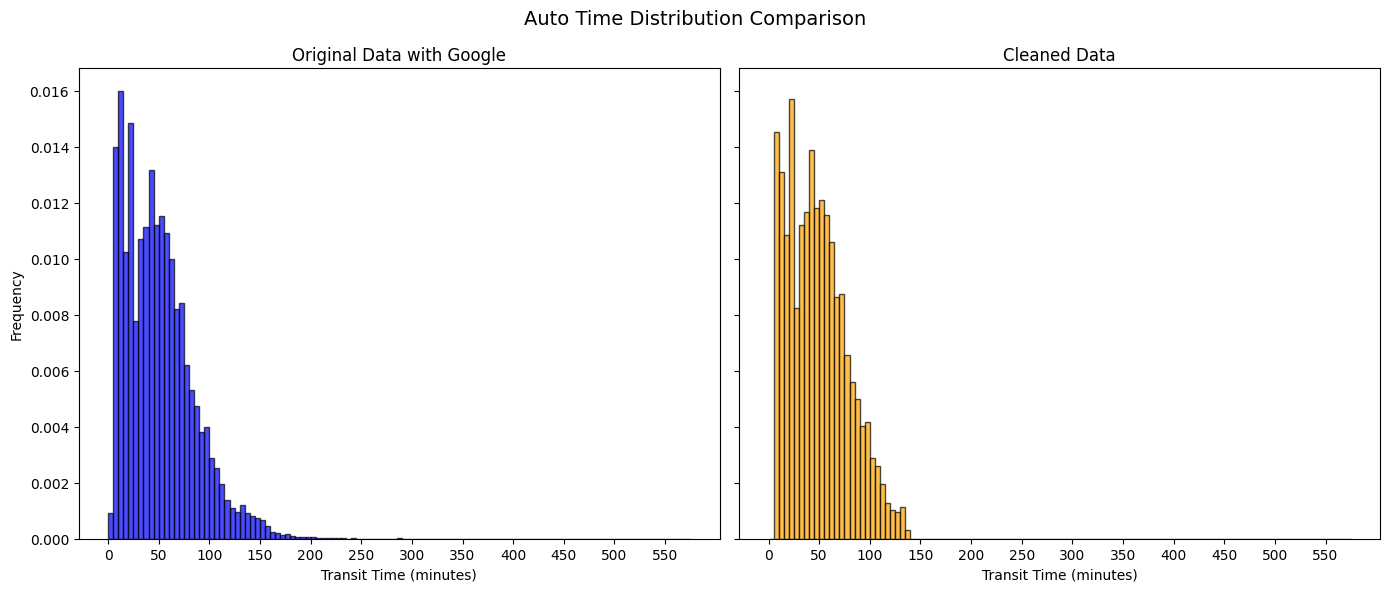

/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['o_fips'] = df['o_fips'].astype('Int64').astype(str).str.zfill(12)
/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_fips'] = df['d_fips'].astype('Int64').astype(str).str.zfill(12)


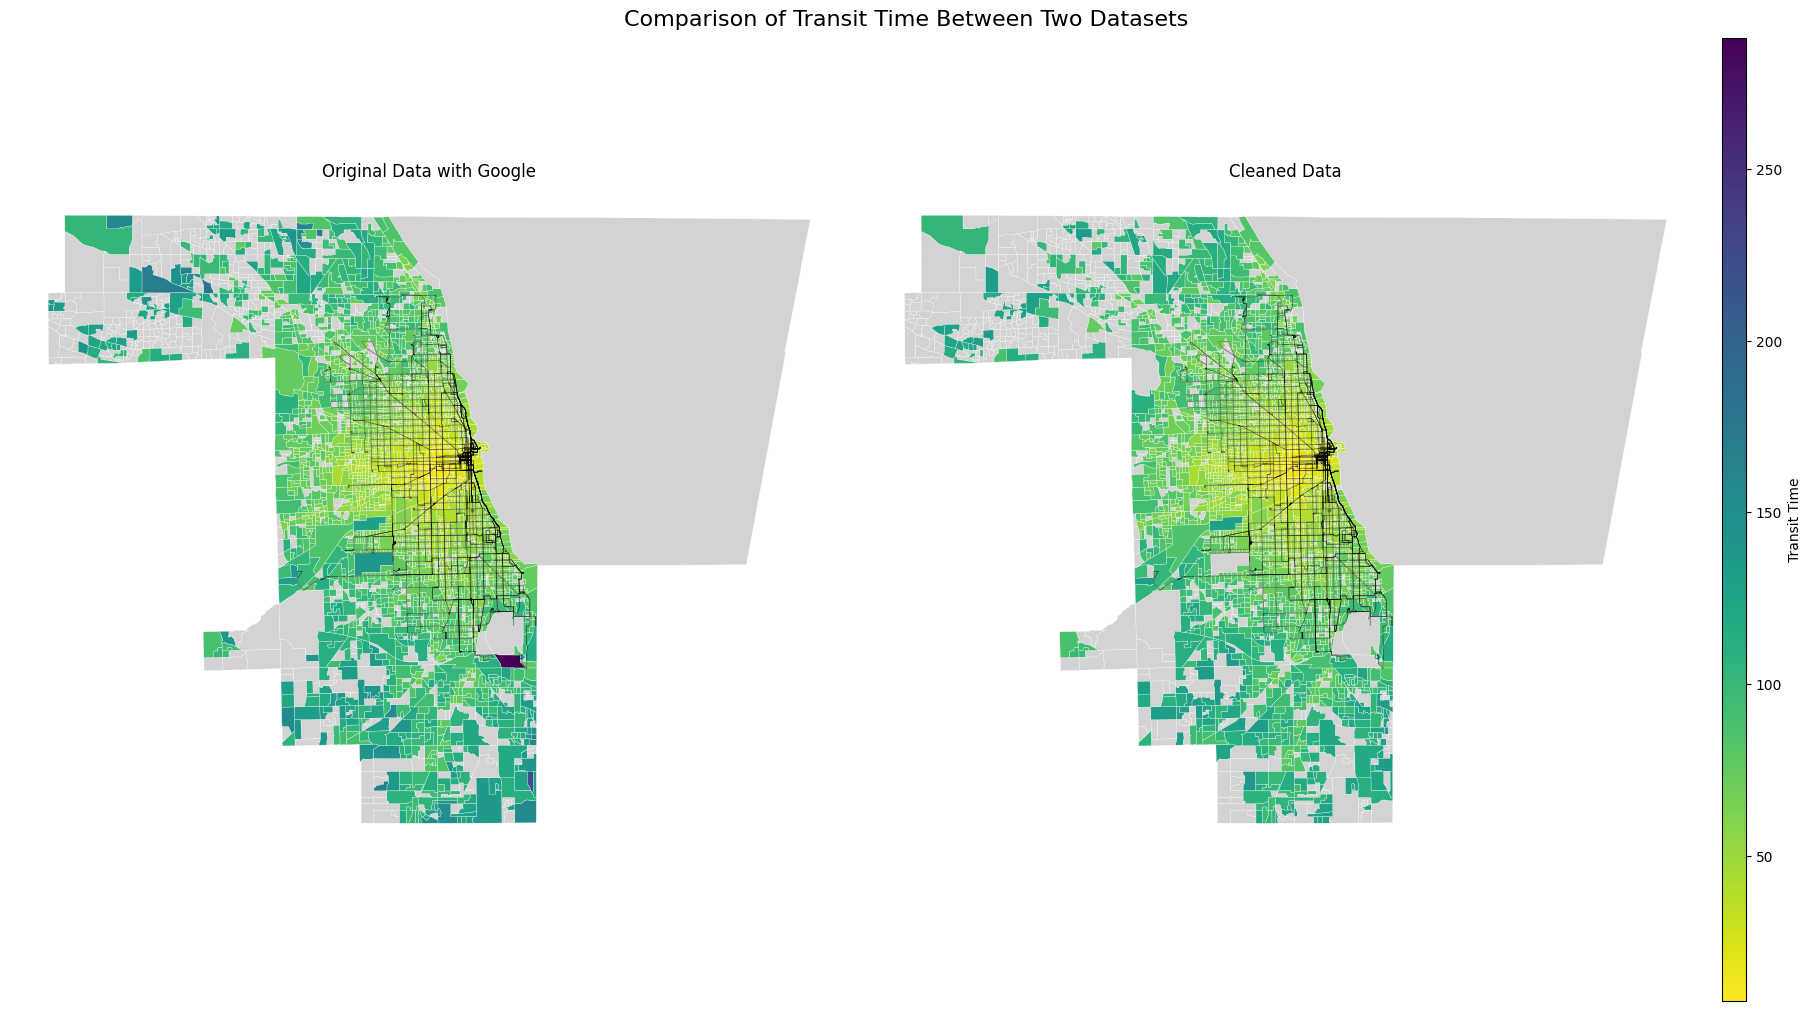

/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['o_fips'] = df['o_fips'].astype('Int64').astype(str).str.zfill(12)
/Users/zhouyuqi/本地文稿/DOE_UFL/spatial_visualization.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_fips'] = df['d_fips'].astype('Int64').astype(str).str.zfill(12)


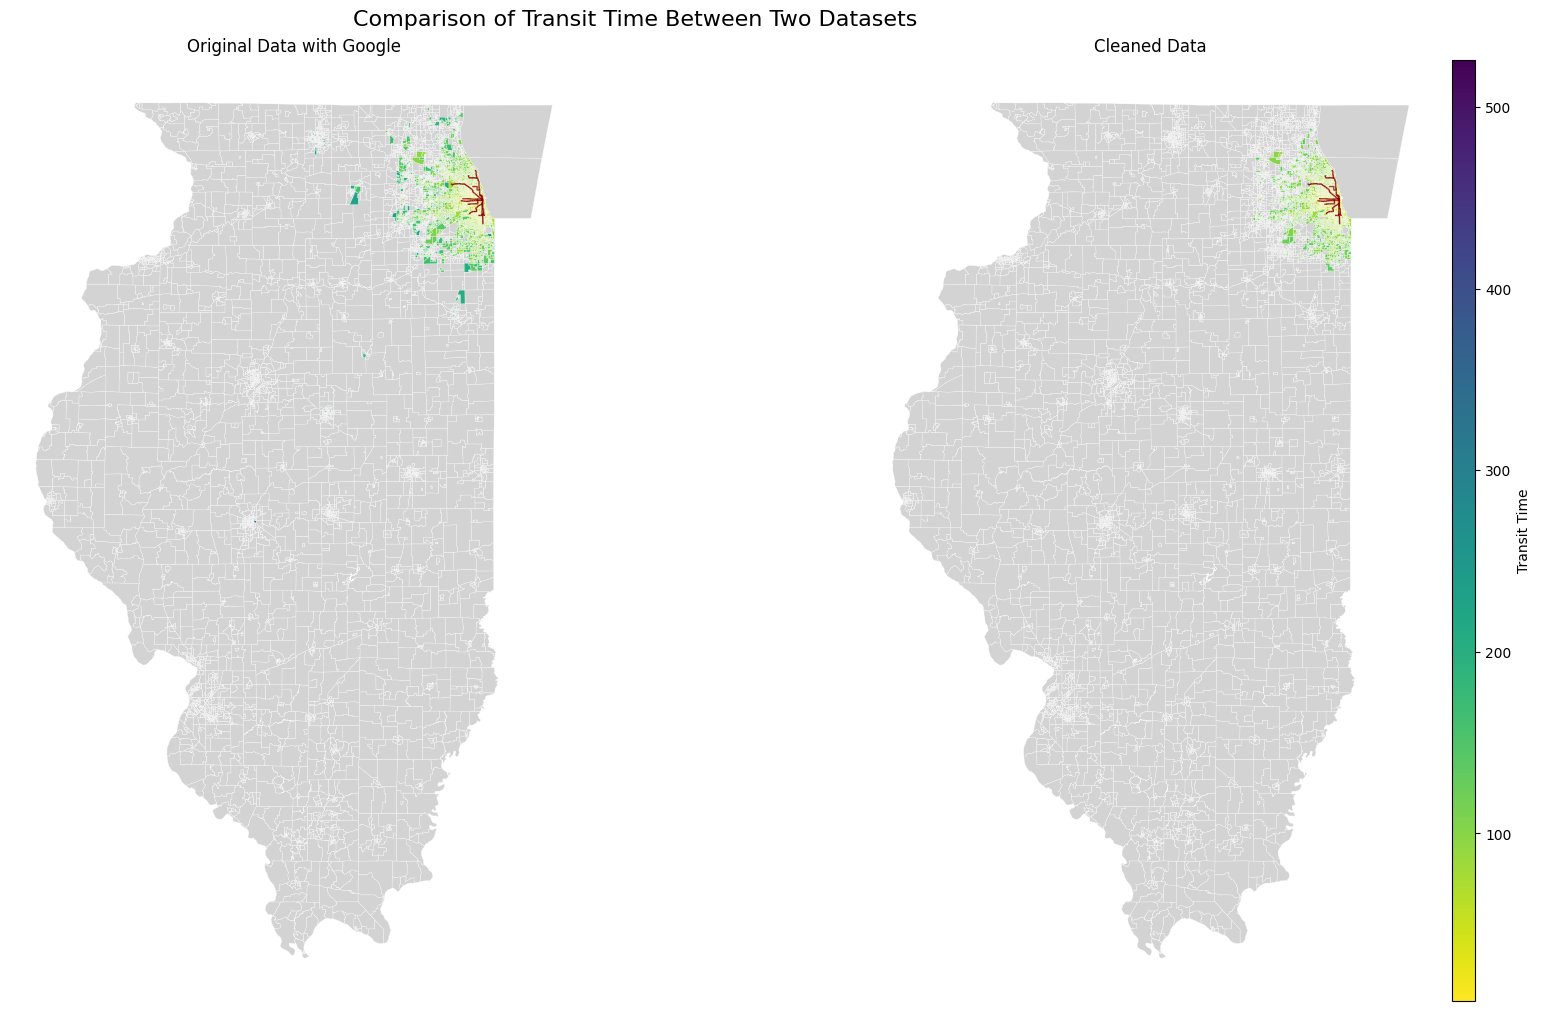

In [11]:
compare_histograms(
    df1=df_with_google,
    df2=df_clean3,
    column='transit_time',
    labels=('Original Data with Google', 'Cleaned Data'),
    colors=('blue', 'orange'),
    bins=100,
    step=50,
    title='Auto Time Distribution Comparison'
)
compare_two_datasets_on_map(
    df1=df_with_google,
    df2=df_clean3,
    value_column='transit_time',
    cmap='viridis_r',
    region='chicago',
    titles=('Original Data with Google', 'Cleaned Data'),
     bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    # rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)
compare_two_datasets_on_map(
    df1=df_with_google,
    df2=df_clean3,
    value_column='transit_time',
    cmap='viridis_r',
    # region='chicago',
    titles=('Original Data with Google', 'Cleaned Data'),
    #  bus_shapefile='./data/CTA_Bus Routes_2024/bus_routes.shp',
    rail_shapefile='./data/CTA_RailLines_2024/Rail_route.shp'
)

In [12]:
df_clean3.to_csv('./data/Replica_processed/processed_with_google-cleaned-trips-end-at-imd-2024-spring-thursday.csv', index=False)